# unemployment Analysis using

1. Check the missing data

2. Which state has the most data

3. Take the mean of rate and visualize the data

4. Showing ten states with exact

5. Which county has highly yearly fluctations

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read salaries datasets
unemployment = pd.read_csv('output.csv',low_memory=False)

In [3]:
#check the head of data
unemployment.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [4]:
#info about data
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    885548 non-null  int64  
 1   Month   885548 non-null  object 
 2   State   885548 non-null  object 
 3   County  885548 non-null  object 
 4   Rate    885548 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


C:\Users\mgopa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


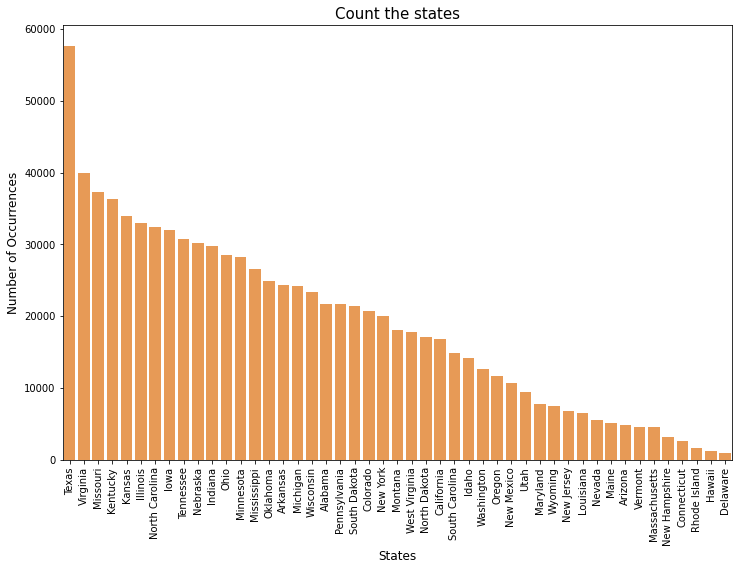

In [6]:
#Which state has the most data
color = sns.color_palette()
cnt_srs = unemployment.State.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Count the states', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\mgopa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


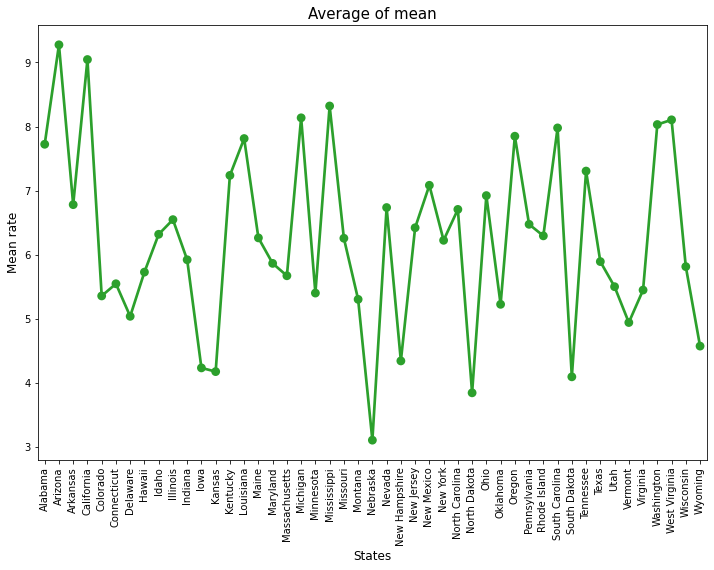

In [7]:
# take the mean of rate state by state
grouped_df = unemployment.groupby(["State"])["Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['State'].values, grouped_df['Rate'].values, alpha=0.8, color=color[2])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
#see the number of unique states
unemployment.State.nunique()

47

In [9]:
#See exact numbers
make_total = unemployment.pivot_table("Rate",index=['State'],aggfunc='mean')
topstate=make_total.sort_values(by='Rate',ascending=False)[:47]
print(topstate)

                    Rate
State                   
Arizona         9.274588
California      9.045005
Mississippi     8.320517
Michigan        8.136136
West Virginia   8.104809
Washington      8.031513
South Carolina  7.978737
Oregon          7.849271
Louisiana       7.812949
Alabama         7.723844
Tennessee       7.305776
Kentucky        7.238306
New Mexico      7.083895
Ohio            6.923390
Arkansas        6.782210
Nevada          6.737019
North Carolina  6.708099
Illinois        6.548596
Pennsylvania    6.475843
New Jersey      6.422105
Idaho           6.319992
Rhode Island    6.295802
Maine           6.263985
Missouri        6.258425
New York        6.226225
Indiana         5.922725
Texas           5.894519
Maryland        5.866422
Wisconsin       5.815659
Hawaii          5.730401
Massachusetts   5.673611
Connecticut     5.548534
Utah            5.503076
Virginia        5.450772
Minnesota       5.403750
Colorado        5.358946
Montana         5.305418
Oklahoma        5.228062


In [10]:
#Calculate  which models has highest yearly fluncations
maketotal_1 = unemployment.pivot_table(values='Rate',index=['Month','State','County'],aggfunc=np.std)
df1 = maketotal_1.reset_index().dropna(subset=['Rate'])
df2 = df1.loc[df1.groupby('State')['Rate'].idxmax()]
for index,row in df2.iterrows():
    print(row['State'],"State which",row['County'],"has the highest yearly fluncation.")

Alabama State which Wilcox County has the highest yearly fluncation.
Arizona State which Yuma County has the highest yearly fluncation.
Arkansas State which Arkansas County has the highest yearly fluncation.
California State which Imperial County has the highest yearly fluncation.
Colorado State which San Juan County has the highest yearly fluncation.
Connecticut State which Windham County has the highest yearly fluncation.
Delaware State which Sussex County has the highest yearly fluncation.
Hawaii State which Kauai County has the highest yearly fluncation.
Idaho State which Adams County has the highest yearly fluncation.
Illinois State which Boone County has the highest yearly fluncation.
Indiana State which Elkhart County has the highest yearly fluncation.
Iowa State which Winnebago County has the highest yearly fluncation.
Kansas State which Wilson County has the highest yearly fluncation.
Kentucky State which Russell County has the highest yearly fluncation.
Louisiana State which 